## Linear regression for manufacturing data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [89]:
# Import the libraries required for learning.
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD # Stochastic gradient descent

In [90]:
# There are two files we will use, train_data.csv and test_data.csv
base_path = '/content/gdrive/My Drive/Data/' # Set the folder path where the data files are located
train_data_path = base_path + 'concrete_train.csv' # Set the file path for train_data.csv

In [91]:
x_train = pd.read_csv(train_data_path, usecols=['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']) # Change the input columns according to your data
x_train = np.array(x_train)/100 # Change the x_train data as array by numpy
print(x_train.shape)

(800, 8)


In [96]:
# Read y1, and y2 column from train path data file
y_train = pd.read_csv(train_data_path, usecols=['Strength']) # Change the output columns according to your data
y_train = np.array(y_train)/100 # Change the y_train data as array by numpy
print(y_train.shape)

(800, 1)


In [97]:
model = Sequential()

model.add(Flatten(input_shape=(8,)))  # Change the input number according to your data.
model.add(Dense(1, activation = 'linear')) # Change the output number according to your data.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [98]:
model.compile(optimizer = SGD(learning_rate=1e-3), loss = 'mse')
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [99]:
history = model.fit(x_train, y_train, batch_size = 20, epochs= 500, verbose = 1)

Epoch 1/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5938
Epoch 2/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4288
Epoch 3/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3766
Epoch 4/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3400
Epoch 5/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3106
Epoch 6/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2949
Epoch 7/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2498
Epoch 8/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2270
Epoch 9/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2072
Epoch 10/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1827
Epoch 11/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1597
Epoch 12/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1553
Epoch 13/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1447
Epoch 14/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1151
Epoch 15/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1148
Epoc

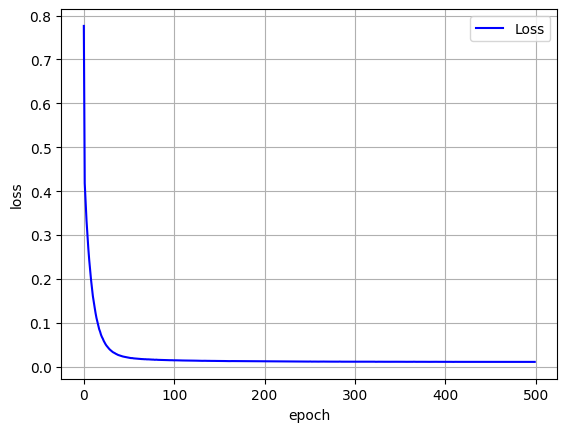

In [100]:
import matplotlib.pyplot as plt

y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_loss, c='blue', label='Loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [101]:
test_data_path = base_path + 'concrete_test.csv' # Generate test data path

x_test = pd.read_csv(test_data_path, usecols=['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']) # Generate x test data
x_test = np.array(x_test)/100

y_test = pd.read_csv(test_data_path, usecols=['Strength']) # Generate y test data
y_test = np.array(y_test)/100
y_test.shape

(200, 1)

In [102]:
result = model.predict(x_test)

print(result)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[[0.5880385 ]
 [0.19742729]
 [0.21156482]
 [0.20218243]
 [0.34654808]
 [0.6284846 ]
 [0.35234243]
 [0.81710595]
 [0.30698326]
 [0.27361   ]
 [0.54594827]
 [0.6069016 ]
 [0.25611088]
 [0.26717588]
 [0.2510466 ]
 [0.4329934 ]
 [0.38344687]
 [0.59474856]
 [0.36658666]
 [0.29181027]
 [0.20977639]
 [0.4374802 ]
 [0.40489542]
 [0.49018434]
 [0.55567324]
 [0.2241966 ]
 [0.19310512]
 [0.5110704 ]
 [0.4336697 ]
 [0.23574989]
 [0.13257171]
 [0.5294193 ]
 [0.24543135]
 [0.19933845]
 [0.40437305]
 [0.39420474]
 [0.33670297]
 [0.36544412]
 [0.22957076]
 [0.66582197]
 [0.13275702]
 [0.34213558]
 [0.20819984]
 [0.241313  ]
 [0.15453489]
 [0.2979551 ]
 [0.2601382 ]
 [0.24891625]
 [0.23483373]
 [0.34263363]
 [0.57246834]
 [0.5922142 ]
 [0.5743522 ]
 [0.23440357]
 [0.21897809]
 [0.22025533]
 [0.37812984]
 [0.27908128]
 [0.21971403]
 [0.4453199 ]
 [0.3045585 ]
 [0.419217  ]
 [0.55359095]
 [0.27931255]
 [0.22917514]
 [0.59630007]
 [0.31692365]
 [0.5170645 ]
 [0.269406

In [103]:
loss = model.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0126


In [104]:
# Calculate the error. (|True value - Predicted value|/True value)*100

error_sigma = np.mean(np.abs(y_test - result)/y_test)*100
print(error_sigma)

31.12011323537865


<ipython-input-105-3dc82b7dc1ab>:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


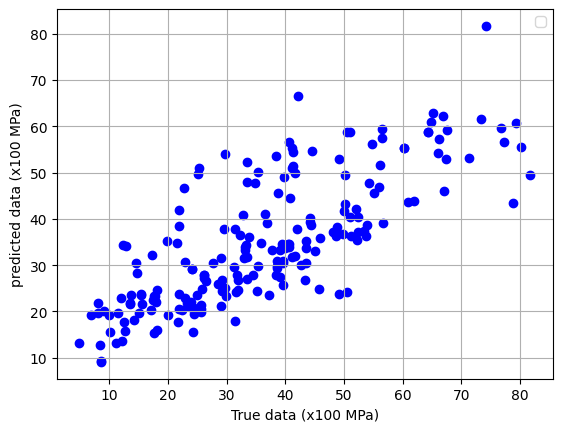

In [105]:
plt.scatter(y_test * 100, result * 100, c='blue') # plot scatter with 1st column of output data
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('True data (x100 MPa)')
plt.ylabel('predicted data (x100 MPa)')
# plt.xlim([2.0, 8.0])
# plt.ylim([2.0, 8.0])
plt.show()